# Finding Heavy Traffic Indicators on I-94

In this project, we will be analyzing the data set about the I-94 Interstate highway. The data set can be found ['here'](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume). 

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weathertype. time of the day, timne of the week, etc.
 
Lets begin by opening our data set so we can examine it. 

In [1]:
import pandas as pd

i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
i_94.tail()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


We can see now the names of all the columns. There are 9 total columns and 48204 rows(entries) in this data set. each row describes the weather and traffic data for a specific hour. in this data set we have entries from 2012-10-02 09:00:00 until 2018-09-30 23:00:00.	

a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.


## Traffic Volume

Lets analyze the distribution of the traffic volume column of our data set.

<function matplotlib.pyplot.show(*args, **kw)>

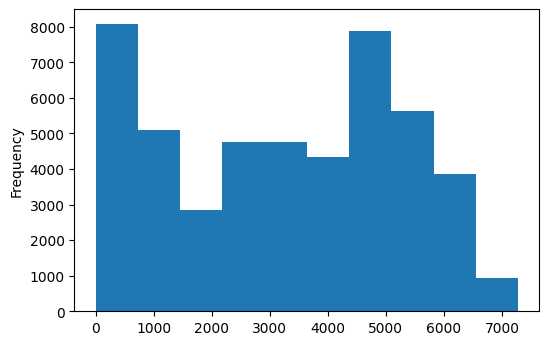

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

i_94['traffic_volume'].plot.hist()
plt.show


In [5]:
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

We can see that the traffic volume varried between 0 all the way to 7280 cars with an average of 3260 cars. So there is a big variation in the amount of traffic volume through out this time. 

25% of the time the traffic volume is all the way down at 1193 cars. This could be due to the time off the day perhaps. Also, 25% of the time the traffic goes all the way upto 4933 thich is more triple than before. 

This variation in traffic volume could be influenced by daytime and nighttime. Lets examine this further.

## Traffic Volume: Daytime and Nighttime

Lets divide the data set between two times. 

1. Day time (from 7AM to 7PM)
2. Night time (from 7PM to 7AM)

In [6]:
i_94['date_time'] = pd.to_datetime(i_94['date_time'])

day = i_94.copy()[(i_94['date_time'].dt.hour >= 7) & (i_94['date_time'].dt.hour < 19)]
print(day.shape)

night = i_94.copy()[(i_94['date_time'].dt.hour >=19) | (i_94['date_time'].dt.hour <7)]
print(night.shape)

(23877, 9)
(24327, 9)


Now that we have isolated our daytime data and night nighttime data, we will plot them using a histogram of traffic volume on a grid chart.


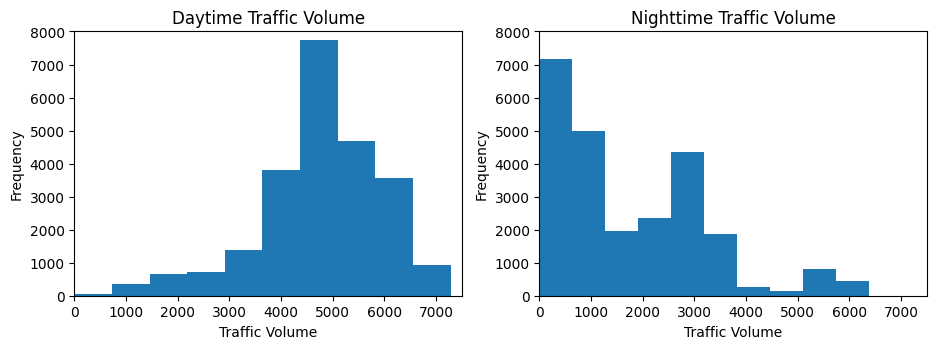

In [7]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.title('Daytime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(0, 7500)
plt.ylim(0, 8000)

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title('Nighttime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(0, 7500)
plt.ylim(0, 8000)

plt.show()

In [8]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [9]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

We can see that the histogram displaying the Daytime traffic volume is left skewed. This means most of the values for traffic volume are high. in the daytime, 75%of the time, there is more than 4252 cars.

In the nighttime histogram, we see that the shape os right skewed meaning the values for traffic volume are more low. 75% of the time, the traffic volume is below 2819 cars. There are some outliers where the traffic volume reaches over 5000 cars. However, for the most part, the traffic volume is genarally light. 

Since our goal is find indicators of heavy traffic, we will only focus our attention towards the day time data.

## Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the Month, Day of the week and Time of day.

First look at the traffic volume for every **month**.

In [10]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

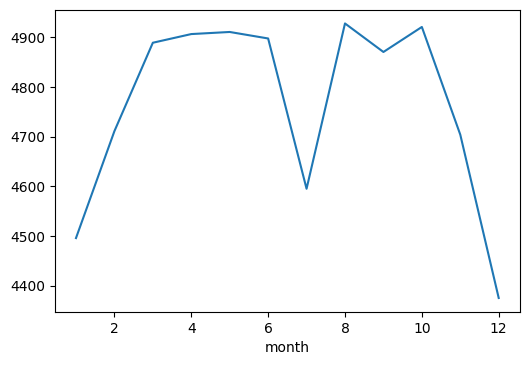

In [11]:
by_month["traffic_volume"].plot.line()

We see that the traffic volume is high in the months of summer(March to October) and lower in the months of winter(November to February).

However, we see that the the month of July, there is a very low traffic volume. Does this mean that the traffic volume in July is low every year?

We can test this by seeing the traffic volume every year only in July.

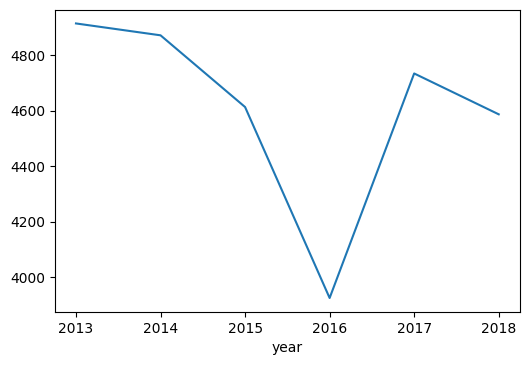

In [12]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

We see that the traffic volume in july is also very high. the only exception is the year of 2016. This is most prbabaly because of road construction. [This article](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) supports our hypothesis.

So we can conclude from this that the warm months generally bring more heavier traffic volume compared to cold months.

Lets analyze the traffic volume based on the **day of the week**.

In [13]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

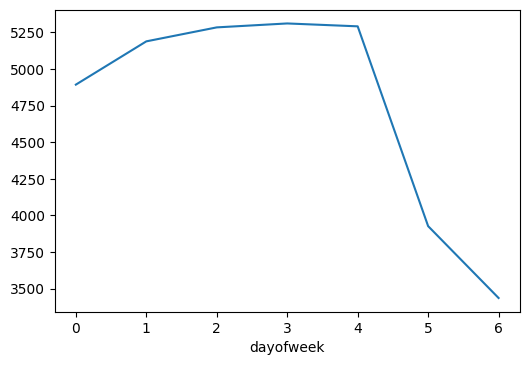

In [14]:
by_dayofweek['traffic_volume'].plot.line()

We can see that the traffic volume is significantly higher on the weekdays(Monday to Friday) compared to the weekends. We see that the weekday values are consistently higher than 5000, except for Monday at around 4800 cars.

On the weekends we see the volume of traffic being below 4000 cars. 

Lets go into further detail and examine the traffic volume based on the **time of the day**. Since the traffic from the weekends will bring the  average traffic volume down, we will look at the average traffic volumes seperately.  

In [15]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


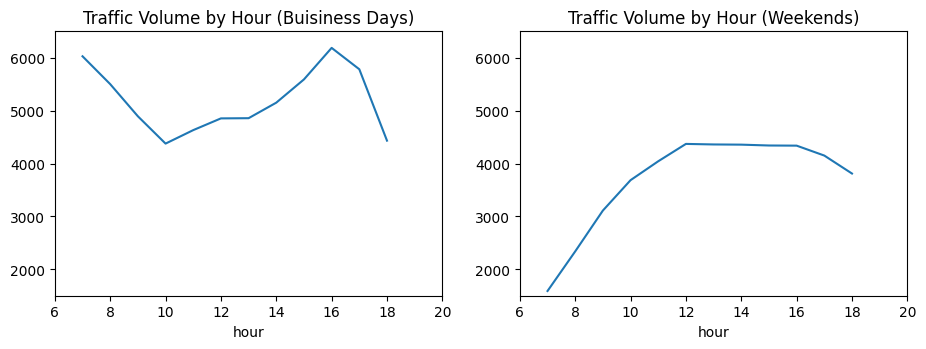

In [16]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Traffic Volume by Hour (Buisiness Days)')
plt.xlim(6, 20)
plt.ylim(1500,6500)

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Traffic Volume by Hour (Weekends)')
plt.xlim(6, 20)
plt.ylim(1500,6500)

plt.show()

We can see that the traffic volume is heavier during the business days compared to the weekends. During the business days, there is a higher volume during rush hours which would be from 7:00 to 16:00. This is wehn people are driving to and back from work. We can see that there are more than 4000 cars during the the entire rush hour and at certain hours the amount of cars goes up to 6000.

So when we analyzed our data, we have identified indicators of heavy traffic that are realted to time. 

1. During the warm months of the year(March to October), there is a greater amount of traffic.

2. There is a greater amount of traffic on the business days compared to the weekends.

3. There is a greater amount of traffic during rush hour(7am to 4pm). 

## Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

In [17]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Out of all the columns, the temp column(temperature) shows us the strongest positive correlation with a value of +0.13. we dont get any strong relations from the other relative columns in our data set.

Lets plot a scatter plot with the temp column and the traffic_volume column.

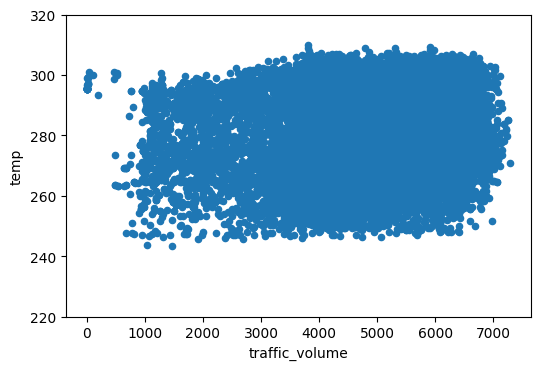

In [19]:
day.plot.scatter('traffic_volume','temp') 
plt.ylim(220,320)
plt.show()

It seems that the temp column does not give us any reason to beleive that it is an indicator of heavy traffic. 

Lets redirect our analyzation towards the weather columns namely 'weather_main' and 'weather_description'.

We're going to calculate the average traffic volume associated with each unique value in these two columns and then plot them on histograms.

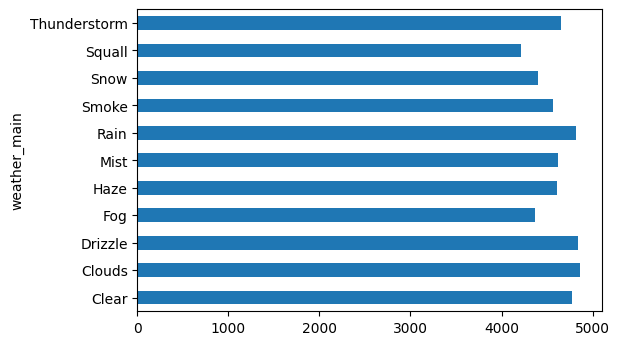

In [20]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

It seems like there is no weather type where the traffic volume exceeds 5000 cars. This makes finding indicators of heavy traffic more difficult. Lets also look at the weather_description column.

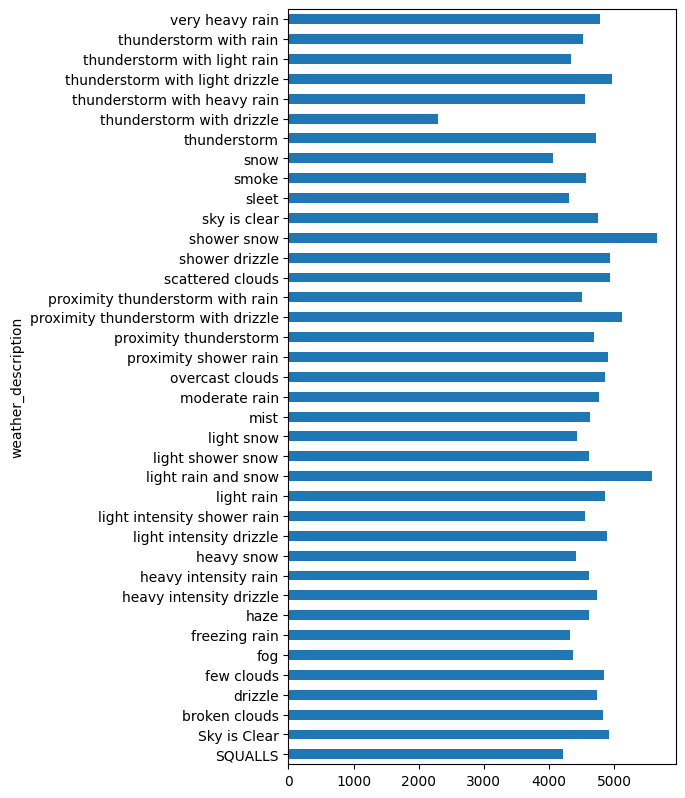

In [23]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

We see that there are three weather descriptions where the traffic volume exceeds 5000 cars. During shower snow, during light rain and snow, and during Proximity thunderstorm with drizzle.

These weather conditions dont seem to be that bad compared to osme of the other weather conditions in this column. But perheps people take out there cars during these conditions because they would prefer to drive instead of walking or biking.

## Conclusion

In this project, our goal was to find indicators of heavy traffic on the I-94 Interstate highway. There were two type of indicators that we foun dduring our analyzation.

1. Time Indicators:
- During the warm months of the year(March to October), there is a greater amount of traffic.
- There is a greater amount of traffic on the business days compared to the weekends.
- There is a greater amount of traffic during rush hour(7am to 4pm). 

2. Weather Indicators: